<h1>Wine Clustering</h1>

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df_wine_feature = wine.feature_names
df_wine_data = pd.DataFrame(wine.data, columns = df_wine_feature)
df_wine_label = pd.DataFrame(wine.target, columns = ['label'])

In [2]:
data = pd.concat([df_wine_data, df_wine_label], axis=1)

data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

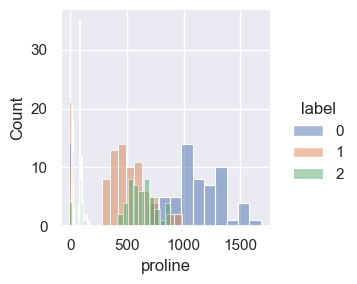

In [19]:
g = sns.FacetGrid(data, hue="label", height=3)

g.map(sns.histplot, "alcohol", alpha=0.5, bins=10)
g.add_legend()

g.map(sns.histplot, "malic_acid", alpha=0.5, bins=10)
g.map(sns.histplot, "ash", alpha=0.5, bins=10)
g.map(sns.histplot, "alcalinity_of_ash", alpha=0.5, bins=10)
g.map(sns.histplot, "magnesium", alpha=0.5, bins=10)
g.map(sns.histplot, "total_phenols", alpha=0.5, bins=10)
g.map(sns.histplot, "flavanoids", alpha=0.5, bins=10)
g.map(sns.histplot, "nonflavanoid_phenols", alpha=0.5, bins=10)
g.map(sns.histplot, "proanthocyanins", alpha=0.5, bins=10)
g.map(sns.histplot, "color_intensity", alpha=0.5, bins=10)
g.map(sns.histplot, "hue", alpha=0.5, bins=10)
g.map(sns.histplot, "od280/od315_of_diluted_wines", alpha=0.5, bins=10)
g.map(sns.histplot, "proline", alpha=0.5, bins=10)

plt.show()

In [14]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [12]:
from sklearn.cluster import KMeans
wcss = []

In [16]:
from sklearn.cluster import KMeans
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

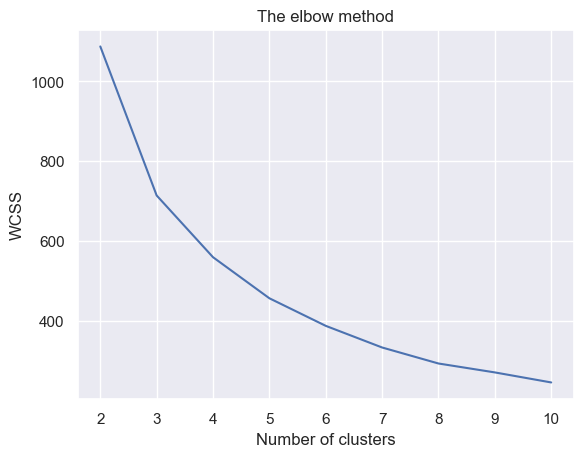

In [17]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()